In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Tools.sample import *
from Tools.visualization import *
from Models.KNearestNeighbor import *

In [12]:
X, y = gen_class(n=40, interval=0.8, label_type=1, random_seed=1)
X_train, X_test, y_train, y_test = split_train_test(X, y, 0.3)

In [3]:
param_list = [[1,2], [3,2], [3,1], [8,2], [8,1], [15,2]]
score_dict = {'Neighbors': list(), 'Norm': list(), 
              'Training Score': list(), 'Testing Score': list()}

for param in param_list:
    tr_score = np.array([])
    te_score = np.array([])
    time_score = np.array([])
    for i in range(100):
        X_tr, X_te, y_tr, y_te = split_train_test(X, y, 0.3)
        model = KNearestNeighbor(n_neighbors=param[0], d=param[1])
        model.fit(X_tr, y_tr)
        tr_score = np.append(tr_score, model.score(X_tr, y_tr))
        te_score = np.append(te_score, model.score(X_te, y_te))
    score_dict['Neighbors'].append(param[0])
    score_dict['Norm'].append(param[1])
    score_dict['Training Score'].append(round(tr_score.mean(), 3))
    score_dict['Testing Score'].append(round(te_score.mean(), 3))

pd.DataFrame(score_dict)

,Neighbors,Norm,Training Score,Testing Score
0,1,2,1.000,0.751
1,3,2,0.880,0.792
2,3,1,0.873,0.768
3,8,2,0.850,0.833
4,8,1,0.864,0.807
5,15,2,0.863,0.841


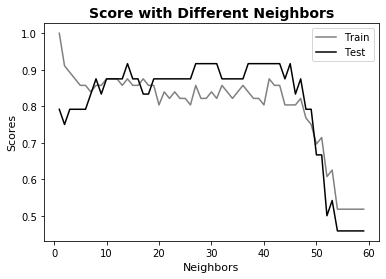

In [4]:
tr_list = []
te_list = []
k_list = range(1,60)
for k in k_list:
    knn = KNearestNeighbor(n_neighbors=k, d=2)
    knn.fit(X_train, y_train)
    tr_list.append(knn.score(X_train, y_train))
    te_list.append(knn.score(X_test, y_test))

plt.plot(k_list, tr_list, label='Train', c='gray')
plt.plot(k_list, te_list, label='Test', c='black')
plt.title('Score with Different Neighbors', fontsize=14, weight='bold')
plt.xlabel("Neighbors", fontsize=11)
plt.ylabel("Scores", fontsize=11)
plt.legend()

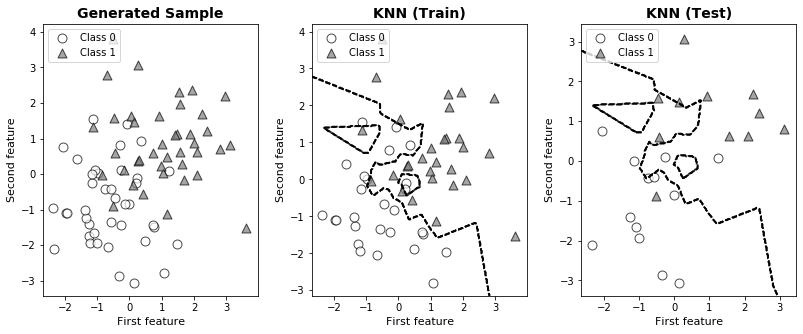

In [5]:
knn = KNearestNeighbor(n_neighbors=1, d=2)
knn.fit(X_train, y_train)

fig = plt.figure(figsize=(13.5,5))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

LinearClassifierPlot(ax=ax1, title='Generated Sample').scatter_plot(X, y)
knn_tr = LinearClassifierPlot(ax=ax2, title='KNN (Train)')
knn_tr.scatter_plot(X_train, y_train)
knn_tr.hyperplane_plot(knn)
knn_te = LinearClassifierPlot(ax=ax3, title='KNN (Test)')
knn_te.scatter_plot(X_test, y_test)
knn_te.hyperplane_plot(knn)

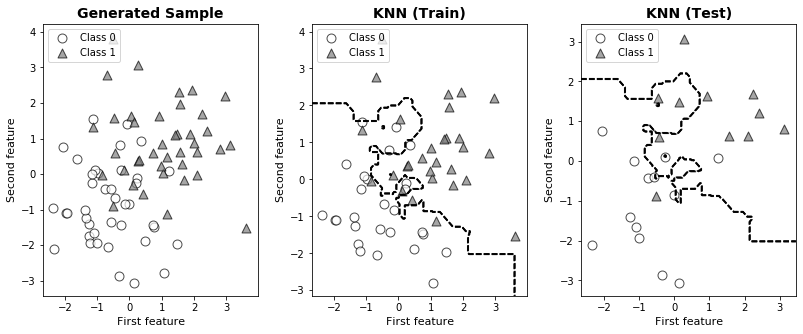

In [6]:
knn = KNearestNeighbor(n_neighbors=3, d=1)
knn.fit(X_train, y_train)

fig = plt.figure(figsize=(13.5,5))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

LinearClassifierPlot(ax=ax1, title='Generated Sample').scatter_plot(X, y)
knn_tr = LinearClassifierPlot(ax=ax2, title='KNN (Train)')
knn_tr.scatter_plot(X_train, y_train)
knn_tr.hyperplane_plot(knn)
knn_te = LinearClassifierPlot(ax=ax3, title='KNN (Test)')
knn_te.scatter_plot(X_test, y_test)
knn_te.hyperplane_plot(knn)

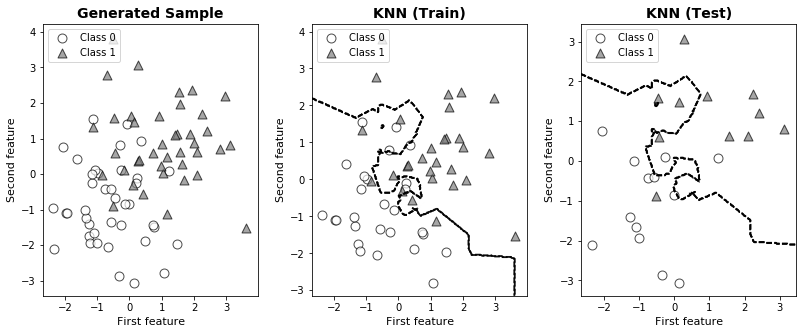

In [7]:
knn = KNearestNeighbor(n_neighbors=3, d=2)
knn.fit(X_train, y_train)

fig = plt.figure(figsize=(13.5,5))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

LinearClassifierPlot(ax=ax1, title='Generated Sample').scatter_plot(X, y)
knn_tr = LinearClassifierPlot(ax=ax2, title='KNN (Train)')
knn_tr.scatter_plot(X_train, y_train)
knn_tr.hyperplane_plot(knn)
knn_te = LinearClassifierPlot(ax=ax3, title='KNN (Test)')
knn_te.scatter_plot(X_test, y_test)
knn_te.hyperplane_plot(knn)

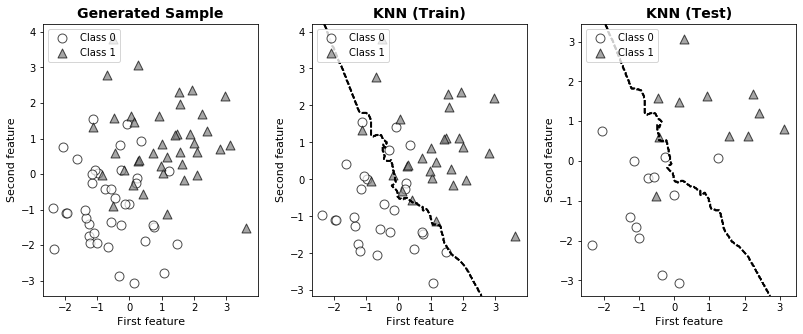

In [13]:
knn = KNearestNeighbor(n_neighbors=15, d=2)
knn.fit(X_train, y_train)

fig = plt.figure(figsize=(13.5,5))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)f

LinearClassifierPlot(ax=ax1, title='Generated Sample').scatter_plot(X, y)
knn_tr = LinearClassifierPlot(ax=ax2, title='KNN (Train)')
knn_tr.scatter_plot(X_train, y_train)
knn_tr.hyperplane_plot(knn)
knn_te = LinearClassifierPlot(ax=ax3, title='KNN (Test)')
knn_te.scatter_plot(X_test, y_test)
knn_te.hyperplane_plot(knn)

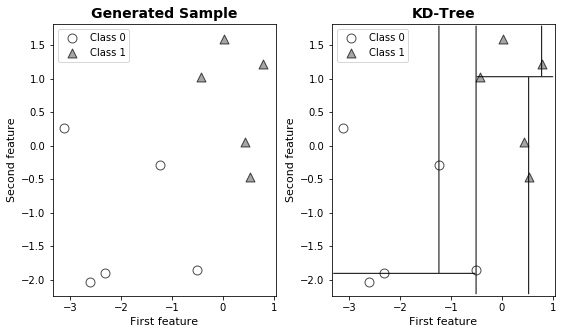

In [11]:
X, y = gen_class(n=5, interval=1, label_type=1, random_seed=2)
X_train, X_test, y_train, y_test = split_train_test(X, y, 0.3)
knn = KNearestNeighbor(n_neighbors=3, d=2)
knn.fit(X, y)

fig = plt.figure(figsize=(9,5))
fig.subplots_adjust(wspace=0.25)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

LinearClassifierPlot(ax=ax1, title='Generated Sample').scatter_plot(X, y)
LinearClassifierPlot(ax=ax2, title='KD-Tree').scatter_plot(X, y)
plot_kd_tree(ax2, knn._tree)